## Question 2 (10 pts)
Use DBscan (try with different parameters) and K-means (K=3) on IRIS Dataset and discuss/compare the results with the iris ground truth.
Please provide an explanation of why K-fold cross validation is not required for the comparison among these different algorithms.

# Here’s a list of advantages of KMeans and DBScan:

- KMeans is much faster than DBScan
- DBScan doesn’t need number of clusters
- Here’s a list of disadvantages of KMeans and DBScan:
- K-means need the number of clusters hidden in the dataset
- DBScan doesn’t work well over clusters with different densities
- DBScan needs a careful selection of its parameters

# The differences between KMeans and DBSCAN:
Unlike k-means, DBSCAN will figure out the number of clusters. DBSCAN works by determining whether the minimum number of points are close enough to one another to be considered part of a single cluster. DBSCAN is very sensitive to scale since epsilon is a fixed value for the maximum distance between two points.

# Loading iris data

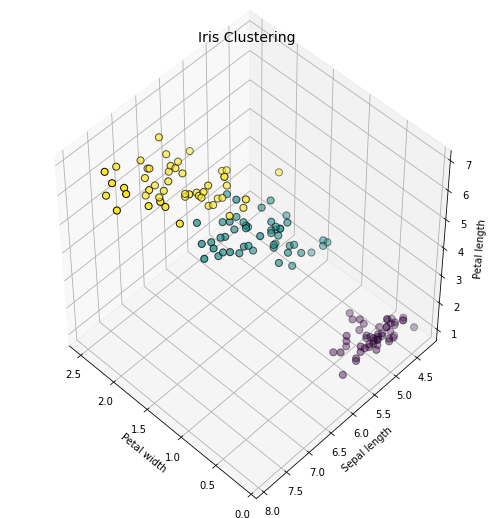

In [16]:
iris=datasets.load_iris()
x=iris.data
y=iris.target
#Plotting
fig = plt.figure(1, figsize=(7,7))
ax = Axes3D(fig, rect=[0, 0, 0.95, 1], elev=48, azim=134)
ax.scatter(x[:, 3], x[:, 0], x[:, 2],c=y, edgecolor="k", s=50)
ax.set_xlabel("Petal width")
ax.set_ylabel("Sepal length")
ax.set_zlabel("Petal length")
plt.title("Iris Clustering", fontsize=14)
plt.show()

# Now coming to evaluating a clustering algorithm, there are two things to consider here:

- If we have the ground truth labels (class information) of the data points available with us (which is not the case here) then we can make use of extrinsic methods like homogeneity score, completeness score and so on.
- But if we do not have the ground truth labels of the data points, we will have to use the intrinsic methods like silhouette score which is based on the silhouette coefﬁcient. We now study this evaluation metric in a bit more details.

# First, we will do DBSCAN with different parameters:

## epsilon
The maximum distance between two samples for one to be considered as in the neighborhood of the other. This is not a maximum bound on the distances of points within a cluster. This is the most important DBSCAN parameter to choose appropriately for your data set and distance function.

# min_samples
The number of samples (or total weight) in a neighborhood for a point to be considered as a core point. This includes the point itself.

## Epsilon=0.5, min_samplesint=5

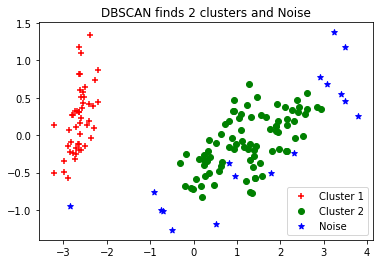

In [17]:
dbscan=DBSCAN()
db=dbscan.fit(x)
pca=PCA(n_components=2).fit(x)
pca_2d=pca.transform(x)
for i in range(0, pca_2d.shape[0]):
    if dbscan.labels_[i] == 0:
        c1 = plt.scatter(pca_2d[i, 0], pca_2d[i, 1], c='r', marker='+')
    elif dbscan.labels_[i] == 1:
        c2 = plt.scatter(pca_2d[i, 0], pca_2d[i, 1], c='g', marker='o')
    elif dbscan.labels_[i] == -1:
        c3 = plt.scatter(pca_2d[i, 0], pca_2d[i, 1], c='b', marker='*')
plt.legend([c1, c2, c3], ['Cluster 1', 'Cluster 2', 'Noise'])
plt.title('DBSCAN finds 2 clusters and Noise')
plt.show()

default eps=0.5, min_samples=5

## Evaluation of clustering with DBSCAN (Epsilon=0.5, min_samplesint=5)

In [18]:
labels = db.labels_
print("Homogeneity: %0.3f" % metrics.homogeneity_score(y, labels))
print("Completeness: %0.3f" % metrics.completeness_score(y, labels))
print("V-measure: %0.3f" % metrics.v_measure_score(y, labels))
print("Adjusted Rand Index: %0.3f" % metrics.adjusted_rand_score(y, labels))
print("Adjusted Mutual Information: %0.3f"% metrics.adjusted_mutual_info_score(y, labels))
print("Silhouette Coefficient: %0.3f" % metrics.silhouette_score(x, labels))

Homogeneity: 0.560
Completeness: 0.657
V-measure: 0.604
Adjusted Rand Index: 0.521
Adjusted Mutual Information: 0.599
Silhouette Coefficient: 0.486


## Epsilon=3, min_samplesint=2

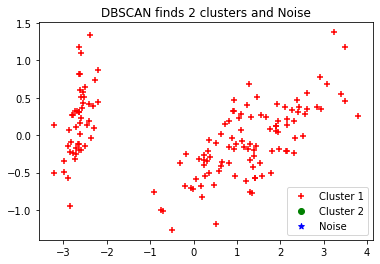

In [19]:
dbscan=DBSCAN(eps=3, min_samples=2)
db=dbscan.fit(x)
pca=PCA(n_components=2).fit(x)
pca_2d=pca.transform(x)
for i in range(0, pca_2d.shape[0]):
    if dbscan.labels_[i] == 0:
        c1 = plt.scatter(pca_2d[i, 0], pca_2d[i, 1], c='r', marker='+')
    elif dbscan.labels_[i] == 1:
        c2 = plt.scatter(pca_2d[i, 0], pca_2d[i, 1], c='g', marker='o')
    elif dbscan.labels_[i] == -1:
        c3 = plt.scatter(pca_2d[i, 0], pca_2d[i, 1], c='b', marker='*')
plt.legend([c1, c2, c3], ['Cluster 1', 'Cluster 2', 'Noise'])
plt.title('DBSCAN finds 2 clusters and Noise')
plt.show()

## Evaluation of clustering with DBSCAN (Epsilon=3, min_samplesint=2)

In [20]:
labels = db.labels_
print("Homogeneity: %0.3f" % metrics.homogeneity_score(y, labels))
print("Completeness: %0.3f" % metrics.completeness_score(y, labels))
print("V-measure: %0.3f" % metrics.v_measure_score(y, labels))
print("Adjusted Rand Index: %0.3f" % metrics.adjusted_rand_score(y, labels))
print("Adjusted Mutual Information: %0.3f"% metrics.adjusted_mutual_info_score(y, labels))
#print("Silhouette Coefficient: %0.3f" % metrics.silhouette_score(x, labels))

Homogeneity: -0.000
Completeness: 1.000
V-measure: -0.000
Adjusted Rand Index: 0.000
Adjusted Mutual Information: -0.000


## Epsilon=0.1, min_samplesint=2

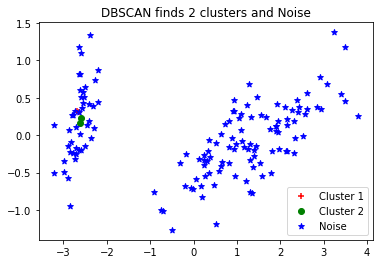

In [21]:
dbscan=DBSCAN(eps=0.1, min_samples=2)
db=dbscan.fit(x)
pca=PCA(n_components=2).fit(x)
pca_2d=pca.transform(x)
for i in range(0, pca_2d.shape[0]):
    if dbscan.labels_[i] == 0:
        c1 = plt.scatter(pca_2d[i, 0], pca_2d[i, 1], c='r', marker='+')
    elif dbscan.labels_[i] == 1:
        c2 = plt.scatter(pca_2d[i, 0], pca_2d[i, 1], c='g', marker='o')
    elif dbscan.labels_[i] == -1:
        c3 = plt.scatter(pca_2d[i, 0], pca_2d[i, 1], c='b', marker='*')
plt.legend([c1, c2, c3], ['Cluster 1', 'Cluster 2', 'Noise'])
plt.title('DBSCAN finds 2 clusters and Noise')
plt.show()

## Evaluation of clustering with DBSCAN (Epsilon=0.1, min_samplesint=2)

In [22]:
labels = db.labels_
print("Homogeneity: %0.3f" % metrics.homogeneity_score(y, labels))
print("Completeness: %0.3f" % metrics.completeness_score(y, labels))
print("V-measure: %0.3f" % metrics.v_measure_score(y, labels))
print("Adjusted Rand Index: %0.3f" % metrics.adjusted_rand_score(y, labels))
print("Adjusted Mutual Information: %0.3f"% metrics.adjusted_mutual_info_score(y, labels))
print("Silhouette Coefficient: %0.3f" % metrics.silhouette_score(x, labels))

Homogeneity: 0.055
Completeness: 0.212
V-measure: 0.087
Adjusted Rand Index: 0.003
Adjusted Mutual Information: 0.039
Silhouette Coefficient: -0.533


## Epsilon=0.7, min_samplesint=2

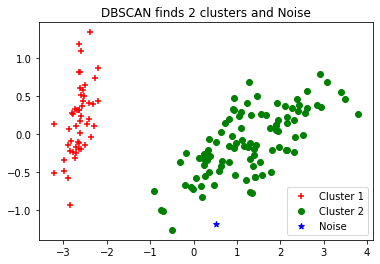

In [23]:
dbscan=DBSCAN(eps=0.7, min_samples=2)
db=dbscan.fit(x)
pca=PCA(n_components=2).fit(x)
pca_2d=pca.transform(x)
for i in range(0, pca_2d.shape[0]):
    if dbscan.labels_[i] == 0:
        c1 = plt.scatter(pca_2d[i, 0], pca_2d[i, 1], c='r', marker='+')
    elif dbscan.labels_[i] == 1:
        c2 = plt.scatter(pca_2d[i, 0], pca_2d[i, 1], c='g', marker='o')
    elif dbscan.labels_[i] == -1:
        c3 = plt.scatter(pca_2d[i, 0], pca_2d[i, 1], c='b', marker='*')
plt.legend([c1, c2, c3], ['Cluster 1', 'Cluster 2', 'Noise'])
plt.title('DBSCAN finds 2 clusters and Noise')
plt.show()

## Evaluation of clustering with DBSCAN (Epsilon=0.7, min_samplesint=2)

In [24]:
labels = db.labels_
print("Homogeneity: %0.3f" % metrics.homogeneity_score(y, labels))
print("Completeness: %0.3f" % metrics.completeness_score(y, labels))
print("V-measure: %0.3f" % metrics.v_measure_score(y, labels))
print("Adjusted Rand Index: %0.3f" % metrics.adjusted_rand_score(y, labels))
print("Adjusted Mutual Information: %0.3f"% metrics.adjusted_mutual_info_score(y, labels))
print("Silhouette Coefficient: %0.3f" % metrics.silhouette_score(x, labels))

Homogeneity: 0.592
Completeness: 0.880
V-measure: 0.708
Adjusted Rand Index: 0.562
Adjusted Mutual Information: 0.701
Silhouette Coefficient: 0.282


## Epsilon=0.7, min_samplesint=10

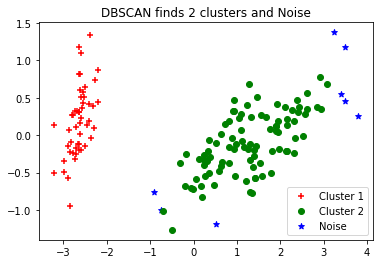

In [25]:
dbscan=DBSCAN(eps=0.7, min_samples=10)
db=dbscan.fit(x)
pca=PCA(n_components=2).fit(x)
pca_2d=pca.transform(x)
for i in range(0, pca_2d.shape[0]):
    if dbscan.labels_[i] == 0:
        c1 = plt.scatter(pca_2d[i, 0], pca_2d[i, 1], c='r', marker='+')
    elif dbscan.labels_[i] == 1:
        c2 = plt.scatter(pca_2d[i, 0], pca_2d[i, 1], c='g', marker='o')
    elif dbscan.labels_[i] == -1:
        c3 = plt.scatter(pca_2d[i, 0], pca_2d[i, 1], c='b', marker='*')
plt.legend([c1, c2, c3], ['Cluster 1', 'Cluster 2', 'Noise'])
plt.title('DBSCAN finds 2 clusters and Noise')
plt.show()

## Evaluation of clustering with DBSCAN (Epsilon=0.7, min_samplesint=10)

In [26]:
labels = db.labels_
print("Homogeneity: %0.3f" % metrics.homogeneity_score(y, labels))
print("Completeness: %0.3f" % metrics.completeness_score(y, labels))
print("V-measure: %0.3f" % metrics.v_measure_score(y, labels))
print("Adjusted Rand Index: %0.3f" % metrics.adjusted_rand_score(y, labels))
print("Adjusted Mutual Information: %0.3f"% metrics.adjusted_mutual_info_score(y, labels))
print("Silhouette Coefficient: %0.3f" % metrics.silhouette_score(x, labels))

Homogeneity: 0.586
Completeness: 0.783
V-measure: 0.671
Adjusted Rand Index: 0.551
Adjusted Mutual Information: 0.666
Silhouette Coefficient: 0.539


## Epsilon=0.7, min_samplesint=20

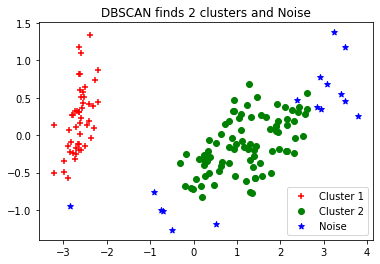

In [27]:
dbscan=DBSCAN(eps=0.7, min_samples=20)
db=dbscan.fit(x)
pca=PCA(n_components=2).fit(x)
pca_2d=pca.transform(x)
for i in range(0, pca_2d.shape[0]):
    if dbscan.labels_[i] == 0:
        c1 = plt.scatter(pca_2d[i, 0], pca_2d[i, 1], c='r', marker='+')
    elif dbscan.labels_[i] == 1:
        c2 = plt.scatter(pca_2d[i, 0], pca_2d[i, 1], c='g', marker='o')
    elif dbscan.labels_[i] == -1:
        c3 = plt.scatter(pca_2d[i, 0], pca_2d[i, 1], c='b', marker='*')
plt.legend([c1, c2, c3], ['Cluster 1', 'Cluster 2', 'Noise'])
plt.title('DBSCAN finds 2 clusters and Noise')
plt.show()

## Evaluation of clustering with DBSCAN (Epsilon=0.7, min_samplesint=20)

In [28]:
labels = db.labels_
print("Homogeneity: %0.3f" % metrics.homogeneity_score(y, labels))
print("Completeness: %0.3f" % metrics.completeness_score(y, labels))
print("V-measure: %0.3f" % metrics.v_measure_score(y, labels))
print("Adjusted Rand Index: %0.3f" % metrics.adjusted_rand_score(y, labels))
print("Adjusted Mutual Information: %0.3f"% metrics.adjusted_mutual_info_score(y, labels))
print("Silhouette Coefficient: %0.3f" % metrics.silhouette_score(x, labels))

Homogeneity: 0.569
Completeness: 0.675
V-measure: 0.617
Adjusted Rand Index: 0.529
Adjusted Mutual Information: 0.612
Silhouette Coefficient: 0.528


## Epsilon=1, min_samplesint=2

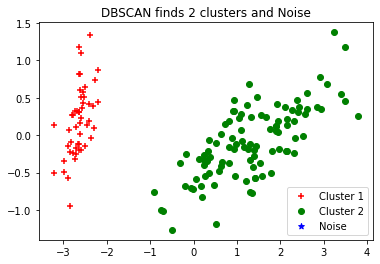

In [29]:
dbscan=DBSCAN(eps=1, min_samples=2)
db=dbscan.fit(x)
pca=PCA(n_components=2).fit(x)
pca_2d=pca.transform(x)
for i in range(0, pca_2d.shape[0]):
    if dbscan.labels_[i] == 0:
        c1 = plt.scatter(pca_2d[i, 0], pca_2d[i, 1], c='r', marker='+')
    elif dbscan.labels_[i] == 1:
        c2 = plt.scatter(pca_2d[i, 0], pca_2d[i, 1], c='g', marker='o')
    elif dbscan.labels_[i] == -1:
        c3 = plt.scatter(pca_2d[i, 0], pca_2d[i, 1], c='b', marker='*')
plt.legend([c1, c2, c3], ['Cluster 1', 'Cluster 2', 'Noise'])
plt.title('DBSCAN finds 2 clusters and Noise')
plt.show()

## Evaluation of clustering with DBSCAN (Epsilon=1, min_samplesint=2)

In [30]:
labels = db.labels_
print("Homogeneity: %0.3f" % metrics.homogeneity_score(y, labels))
print("Completeness: %0.3f" % metrics.completeness_score(y, labels))
print("V-measure: %0.3f" % metrics.v_measure_score(y, labels))
print("Adjusted Rand Index: %0.3f" % metrics.adjusted_rand_score(y, labels))
print("Adjusted Mutual Information: %0.3f"% metrics.adjusted_mutual_info_score(y, labels))
print("Silhouette Coefficient: %0.3f" % metrics.silhouette_score(x, labels))

Homogeneity: 0.579
Completeness: 1.000
V-measure: 0.734
Adjusted Rand Index: 0.568
Adjusted Mutual Information: 0.732
Silhouette Coefficient: 0.687


## Epsilon=0.3, min_samplesint=5

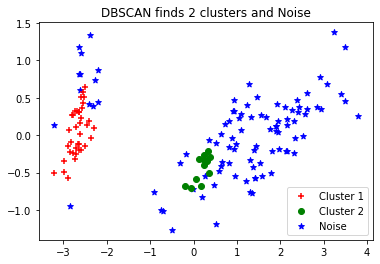

In [31]:
dbscan=DBSCAN(eps=0.3, min_samples=5)
db=dbscan.fit(x)
pca=PCA(n_components=2).fit(x)
pca_2d=pca.transform(x)
for i in range(0, pca_2d.shape[0]):
    if dbscan.labels_[i] == 0:
        c1 = plt.scatter(pca_2d[i, 0], pca_2d[i, 1], c='r', marker='+')
    elif dbscan.labels_[i] == 1:
        c2 = plt.scatter(pca_2d[i, 0], pca_2d[i, 1], c='g', marker='o')
    elif dbscan.labels_[i] == -1:
        c3 = plt.scatter(pca_2d[i, 0], pca_2d[i, 1], c='b', marker='*')
plt.legend([c1, c2, c3], ['Cluster 1', 'Cluster 2', 'Noise'])
plt.title('DBSCAN finds 2 clusters and Noise')
plt.show()

## Evaluation of clustering with DBSCAN (Epsilon=0.3, min_samplesint=5)

In [32]:
labels = db.labels_
print("Homogeneity: %0.3f" % metrics.homogeneity_score(y, labels))
print("Completeness: %0.3f" % metrics.completeness_score(y, labels))
print("V-measure: %0.3f" % metrics.v_measure_score(y, labels))
print("Adjusted Rand Index: %0.3f" % metrics.adjusted_rand_score(y, labels))
print("Adjusted Mutual Information: %0.3f"% metrics.adjusted_mutual_info_score(y, labels))
print("Silhouette Coefficient: %0.3f" % metrics.silhouette_score(x, labels))

Homogeneity: 0.408
Completeness: 0.473
V-measure: 0.438
Adjusted Rand Index: 0.282
Adjusted Mutual Information: 0.426
Silhouette Coefficient: -0.052


## As we can see the epsilon (the maximum distance between two samples for one to be considered as in the neighborhood of the other) is the most important parameter for DBSCAN. Since, we do not know about the number of cluster in DBSCAN, it can realize just two main clusters. The best result that can separate two classes can be provided by Epsilon=1, min_samplesint=2.

# Now, we will do KMeans with different K:

## First, we run KMeans for different K to find the best K:

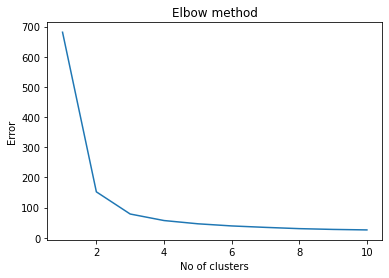

In [33]:
Error =[]
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i).fit(x)
    kmeans.fit(x)
    Error.append(kmeans.inertia_)
import matplotlib.pyplot as plt
plt.plot(range(1, 11), Error)
plt.title('Elbow method')
plt.xlabel('No of clusters')
plt.ylabel('Error')
plt.show()

## Now, we can compare two different K (K=5 and K=3)

In [34]:
kmeans5 = KMeans(n_clusters=5)
y_kmeans5 = kmeans5.fit_predict(x)
print(y_kmeans5)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 3 2 2 2 3 2 3 3 2 3 2 3 2 2 3 2 3 2 3 2 2
 2 2 2 2 2 3 3 3 3 2 3 2 2 2 3 3 3 2 3 3 3 3 3 2 3 3 1 2 4 1 1 4 3 4 1 4 1
 1 1 2 1 1 1 4 4 2 1 2 4 2 1 4 2 2 1 4 4 4 1 2 2 4 1 1 2 1 1 1 2 1 1 1 2 1
 1 2]


In [35]:
kmeans5.cluster_centers_

array([[5.006     , 3.428     , 1.462     , 0.246     ],
       [6.52916667, 3.05833333, 5.50833333, 2.1625    ],
       [6.20769231, 2.85384615, 4.74615385, 1.56410256],
       [5.508     , 2.6       , 3.908     , 1.204     ],
       [7.475     , 3.125     , 6.3       , 2.05      ]])

In [36]:
labels = y_kmeans5
print("Homogeneity: %0.3f" % metrics.homogeneity_score(y, labels))
print("Completeness: %0.3f" % metrics.completeness_score(y, labels))
print("V-measure: %0.3f" % metrics.v_measure_score(y, labels))
print("Adjusted Rand Index: %0.3f" % metrics.adjusted_rand_score(y, labels))
print("Adjusted Mutual Information: %0.3f"% metrics.adjusted_mutual_info_score(y, labels))
print("Silhouette Coefficient: %0.3f" % metrics.silhouette_score(x, labels))

Homogeneity: 0.824
Completeness: 0.599
V-measure: 0.694
Adjusted Rand Index: 0.608
Adjusted Mutual Information: 0.687
Silhouette Coefficient: 0.489


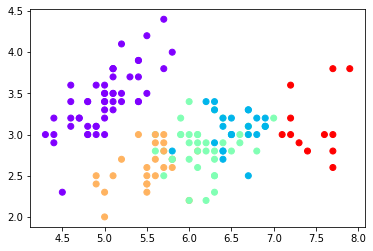

In [37]:
plt.scatter(x[:,0],x[:,1],c=y_kmeans5,cmap='rainbow')

In [38]:
kmeans3 = KMeans(n_clusters=3)
y_kmeans3 = kmeans3.fit_predict(x)
print(y_kmeans3)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 2 2 2 1 2 2 2 2
 2 2 1 1 2 2 2 2 1 2 1 2 1 2 2 1 1 2 2 2 2 2 1 2 2 2 2 1 2 2 2 1 2 2 2 1 2
 2 1]


In [39]:
kmeans3.cluster_centers_

array([[5.006     , 3.428     , 1.462     , 0.246     ],
       [5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
       [6.85      , 3.07368421, 5.74210526, 2.07105263]])

In [40]:
labels = y_kmeans3
print("Homogeneity: %0.3f" % metrics.homogeneity_score(y, labels))
print("Completeness: %0.3f" % metrics.completeness_score(y, labels))
print("V-measure: %0.3f" % metrics.v_measure_score(y, labels))
print("Adjusted Rand Index: %0.3f" % metrics.adjusted_rand_score(y, labels))
print("Adjusted Mutual Information: %0.3f"% metrics.adjusted_mutual_info_score(y, labels))
print("Silhouette Coefficient: %0.3f" % metrics.silhouette_score(x, labels))

Homogeneity: 0.751
Completeness: 0.765
V-measure: 0.758
Adjusted Rand Index: 0.730
Adjusted Mutual Information: 0.755
Silhouette Coefficient: 0.553


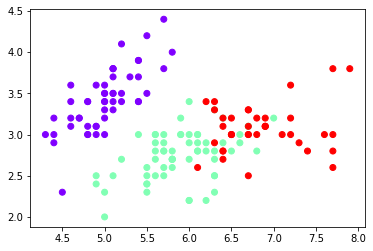

In [41]:
plt.scatter(x[:,0],x[:,1],c=y_kmeans3,cmap='rainbow')

# Since we know there is 3 classes in iris data, KMeans can find 3 classes well when k is 3. 

# Why is not required cross validation:

### In supervised learning, there is always a clear definition of error that quantifies how well f(X) is an approximation of y. We can then use cross validation to obtain an estimate of the out-of-sample (or generalization) error of a model. This error we can use to do mode selection.

### In unsupervised learning, such as clustering, there is usually no clear definition of error. Due to this, also cross-validation cannot be used for this purpose.

### However, there are some methods that determine the quality of a clustering via its stability. Here, stability is assessed via cross-validation or bootstrap schemes.

### Indeed to do traditional cross validation with F1-score or V-Measure as scoring function you would need some labeled data as ground truth. But in this case you could just count the number of classes in the ground truth dataset and use it as your optimal value for K, hence no-need for cross-validation.

### Alternatively you could use a cluster stability measure as unsupervised performance evaluation and do some kind of cross validation procedure for that. However this is not yet implemented in scikit-learn even though it's still on my personal todo list.

# Extra Points ( 5pts)
Implement DBScan by using the KD-tree (you can use for the  KD-tree the implementation in scikit or Numpy). Note that the KD-tree is used for  K-nearest neighbor. 

# Loading iris data

In [42]:
iris=datasets.load_iris()
x=iris.data
y=iris.target

# We can write DBSCAN code from scratch by using KD-tree

In [43]:
iris=datasets.load_iris()
X=iris.data
y=iris.target

y[y==2] = 3
y[y==1] = 2
y[y==0] = 1


y = np.array(y,dtype=int)



def dbscan(X,min_size_cluster,dist_neighbor):
    ## Perform the DBSCAN clustering algorithm on X
    # X : data matrix (the rows represent the observations) size : n x p
    # min_size_cluster : minimum number of points in each cluster
    # dist_neighbor : radius of neighborhood
    n,_ = X.shape
    kdtree = scipy.spatial.KDTree(X)
    X_visit = np.zeros((n,1),dtype=bool)
    clusters = np.zeros((n,1))
    c = 0
    for k in range(0,n):
        if X_visit[k]==0: # if k has not been visited
            X_visit[k] = 1 # k is flagged
            Neighbors = kdtree.query_ball_point(X[k,:],dist_neighbor)
#            Neighbors = neighborhood(X,X[k,:],dist_neighbor) # we look for its neighbors
            if len(Neighbors)<min_size_cluster:
                clusters[k] = -1
            else: # If the point k has enough neighbors
                c = c+1
                clusters[k] = c # we create a cluster and k belong to it
                while len(Neighbors)>0: # Then we study all of its neighbors
                    i = Neighbors.pop()
                    if X_visit[i]==0:   # if i has not been visited, we flag him
                        X_visit[i] = 1
                        Vi = kdtree.query_ball_point(X[i,:],dist_neighbor) # and we look for its neighbors too
                        if len(Vi)>=min_size_cluster: # if it has enough neighbors, we treat them too
                            Neighbors.extend(Vi)
                    if clusters[i]<=0:
                        clusters[i] = c
            
    return clusters

# Now, we can test the code based on ground truth

In [44]:
min_size_cluster = 3
dist_neighbor = 0.5
output = dbscan(X,min_size_cluster,dist_neighbor)
print('The accuracy of DBSCAN based on ground truth labels is ', np.mean(output.reshape(150,)==y))

The accuracy of DBSCAN based on ground truth labels is  0.62


In [45]:
min_size_cluster = 3
dist_neighbor = 0.6
output = dbscan(X,min_size_cluster,dist_neighbor)
print('The accuracy of DBSCAN based on ground truth labels is ', np.mean(output.reshape(150,)==y))

The accuracy of DBSCAN based on ground truth labels is  0.6333333333333333


In [46]:
min_size_cluster = 3
dist_neighbor = 0.7
output = dbscan(X,min_size_cluster,dist_neighbor)
print('The accuracy of DBSCAN based on ground truth labels is ', np.mean(output.reshape(150,)==y))

The accuracy of DBSCAN based on ground truth labels is  0.6666666666666666


In [47]:
min_size_cluster = 3
dist_neighbor = 0.8
output = dbscan(X,min_size_cluster,dist_neighbor)
print('The accuracy of DBSCAN based on ground truth labels is ', np.mean(output.reshape(150,)==y))

The accuracy of DBSCAN based on ground truth labels is  0.6666666666666666


In [48]:
min_size_cluster = 3
dist_neighbor = 0.9
output = dbscan(X,min_size_cluster,dist_neighbor)
print('The accuracy of DBSCAN based on ground truth labels is ', np.mean(output.reshape(150,)==y))

The accuracy of DBSCAN based on ground truth labels is  0.6666666666666666
